<a href="https://colab.research.google.com/github/kolayankita77-gif/ml_assignments/blob/main/customer_segmentation(13).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
updated_customer=files.upload()


Saving Cust_Segmentation.csv to Cust_Segmentation.csv


In [3]:
import pandas as pd

df = pd.read_csv('Cust_Segmentation.csv')
print(df.head())

   Customer Id  Age  Edu  Years Employed  Income  Card Debt  Other Debt  \
0            1   41    2               6      19      0.124       1.073   
1            2   47    1              26     100      4.582       8.218   
2            3   33    2              10      57      6.111       5.802   
3            4   29    2               4      19      0.681       0.516   
4            5   47    1              31     253      9.308       8.908   

   Defaulted Address  DebtIncomeRatio  
0        0.0  NBA001              6.3  
1        0.0  NBA021             12.8  
2        1.0  NBA013             20.9  
3        0.0  NBA009              6.3  
4        0.0  NBA008              7.2  


In [4]:
print(df.isnull().sum())

Customer Id          0
Age                  0
Edu                  0
Years Employed       0
Income               0
Card Debt            0
Other Debt           0
Defaulted          150
Address              0
DebtIncomeRatio      0
dtype: int64


In [5]:
print(df.dtypes)

Customer Id          int64
Age                  int64
Edu                  int64
Years Employed       int64
Income               int64
Card Debt          float64
Other Debt         float64
Defaulted          float64
Address             object
DebtIncomeRatio    float64
dtype: object


In [6]:
categorical_cols = df.select_dtypes(include=['object']).columns
print("Categorical columns:", categorical_cols)


df_encoded = pd.get_dummies(df, columns=categorical_cols)
print(df_encoded.head())


Categorical columns: Index(['Address'], dtype='object')
   Customer Id  Age  Edu  Years Employed  Income  Card Debt  Other Debt  \
0            1   41    2               6      19      0.124       1.073   
1            2   47    1              26     100      4.582       8.218   
2            3   33    2              10      57      6.111       5.802   
3            4   29    2               4      19      0.681       0.516   
4            5   47    1              31     253      9.308       8.908   

   Defaulted  DebtIncomeRatio  Address_NBA000  ...  Address_NBA022  \
0        0.0              6.3           False  ...           False   
1        0.0             12.8           False  ...           False   
2        1.0             20.9           False  ...           False   
3        0.0              6.3           False  ...           False   
4        0.0              7.2           False  ...           False   

   Address_NBA023  Address_NBA024  Address_NBA025  Address_NBA026  \
0  

In [8]:
X = df_encoded[['Income', 'DebtIncomeRatio']]

In [9]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [10]:
from sklearn.cluster import KMeans

kmeans_euclidean = KMeans(n_clusters=5, random_state=42)
kmeans_euclidean.fit(X_scaled)
labels_euclidean = kmeans_euclidean.labels_


In [11]:
!pip install pyclustering

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 33.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyclustering: filename=pyclustering-0.10.1.2-py3-none-any.whl size=2395100 sha256=679fc1ada62c58f32d30d35d87e98874250eed82ced7d12708b2228101cfa8fb
  Stored in directory: /root/.cache/pip/wheels/68/29/b4/131bd7deec3663cc311ab9aa64d6517c3e3ec24bcadfc32f74
Successfully built pyclustering


In [12]:
from pyclustering.cluster.kmedoids import kmedoids
from pyclustering.utils import distance_metric, type_metric
import numpy as np

# Convert your scaled data to list for pyclustering
data = X_scaled.tolist()

# Initialize medoids indices (choose intelligently or random)
initial_medoids = [0, 1, 2, 3, 4]  # example indices of initial medoids

# Define manhattan distance metric
manhattan_metric = distance_metric(type_metric.MANHATTAN)

# Create the kmedoids instance with Manhattan metric
kmedoids_instance = kmedoids(data, initial_medoids, metric=manhattan_metric)

# Run clustering process
kmedoids_instance.process()

# Get clusters and medoids
clusters = kmedoids_instance.get_clusters()
medoids = kmedoids_instance.get_medoids()

print("Clusters:", clusters)
print("Medoids:", medoids)


Clusters: [[8, 14, 15, 17, 19, 21, 27, 29, 33, 35, 37, 40, 55, 67, 68, 75, 77, 83, 86, 87, 88, 96, 98, 103, 104, 107, 112, 114, 116, 120, 121, 124, 132, 134, 135, 137, 138, 141, 142, 143, 147, 152, 153, 163, 164, 169, 171, 173, 178, 187, 188, 195, 202, 205, 210, 214, 218, 220, 224, 227, 229, 233, 236, 240, 242, 247, 248, 249, 256, 257, 259, 265, 270, 274, 278, 279, 283, 285, 295, 296, 297, 298, 302, 303, 309, 311, 312, 317, 319, 329, 332, 333, 340, 346, 357, 365, 371, 379, 380, 383, 385, 390, 394, 395, 396, 403, 404, 414, 415, 417, 420, 422, 423, 427, 432, 433, 441, 442, 444, 447, 451, 452, 455, 457, 458, 465, 471, 472, 475, 480, 484, 492, 495, 498, 501, 505, 510, 511, 512, 515, 516, 518, 521, 523, 524, 525, 530, 538, 543, 547, 552, 554, 555, 570, 572, 573, 574, 578, 579, 582, 590, 595, 599, 601, 602, 604, 606, 607, 608, 614, 621, 622, 630, 631, 635, 638, 640, 647, 651, 660, 664, 669, 674, 679, 681, 684, 692, 697, 698, 699, 700, 704, 709, 720, 721, 722, 727, 729, 736, 738, 749, 750, 75

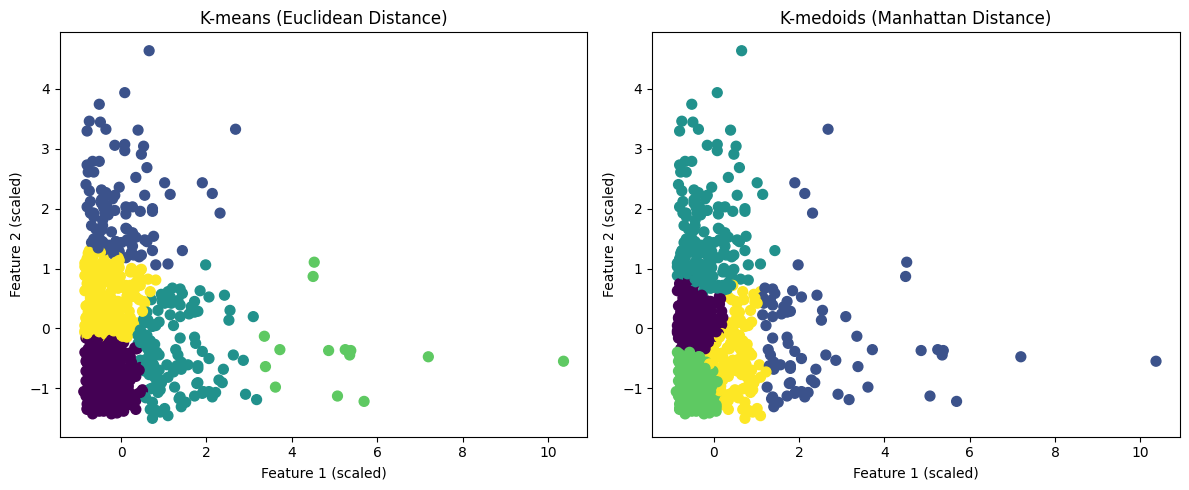

In [13]:
import matplotlib.pyplot as plt
import numpy as np

# Convert pyclustering clusters to labels array for Manhattan
labels_manhattan = np.zeros(len(X_scaled), dtype=int)
for cluster_idx, cluster_points in enumerate(clusters):
    for point_idx in cluster_points:
        labels_manhattan[point_idx] = cluster_idx

plt.figure(figsize=(12, 5))

# Euclidean clusters (from KMeans)
plt.subplot(1, 2, 1)
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=labels_euclidean, cmap='viridis', s=50)
plt.title('K-means (Euclidean Distance)')
plt.xlabel('Feature 1 (scaled)')
plt.ylabel('Feature 2 (scaled)')

# Manhattan clusters (from KMedoids with pyclustering)
plt.subplot(1, 2, 2)
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=labels_manhattan, cmap='viridis', s=50)
plt.title('K-medoids (Manhattan Distance)')
plt.xlabel('Feature 1 (scaled)')
plt.ylabel('Feature 2 (scaled)')

plt.tight_layout()
plt.show()


In [15]:
from sklearn.preprocessing import StandardScaler

# Select 3 features for 3D plotting
X_3d = df[['Age', 'Income', 'DebtIncomeRatio']]

# Scale the features
scaler = StandardScaler()
X_3d_scaled = scaler.fit_transform(X_3d)

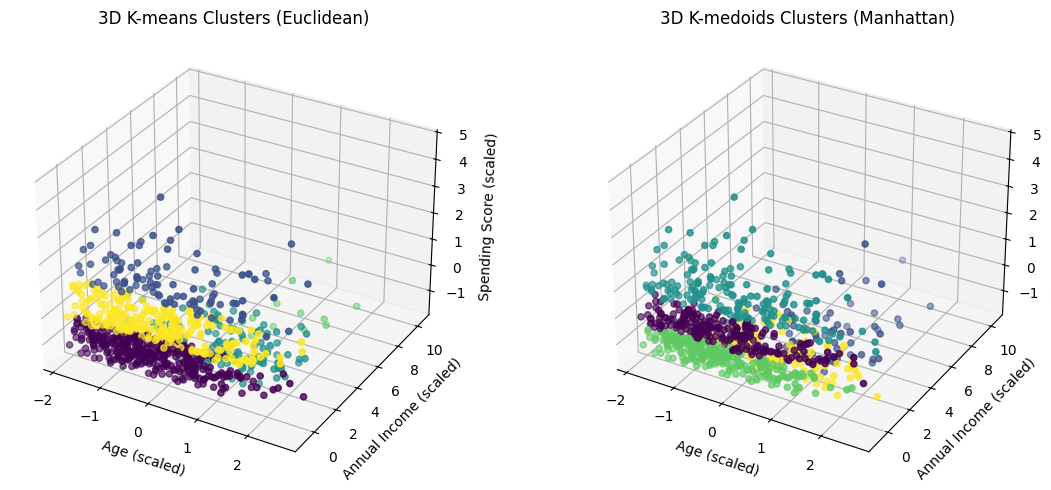

In [16]:
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D

# Convert pyclustering clusters to labels array for Manhattan
labels_manhattan = np.zeros(len(X_3d_scaled), dtype=int)
for cluster_idx, cluster_points in enumerate(clusters):
    for point_idx in cluster_points:
        labels_manhattan[point_idx] = cluster_idx

fig = plt.figure(figsize=(12, 5))

# Euclidean (KMeans) plot
ax1 = fig.add_subplot(121, projection='3d')
ax1.scatter(X_3d_scaled[:,0], X_3d_scaled[:,1], X_3d_scaled[:,2], c=labels_euclidean, cmap='viridis')
ax1.set_title('3D K-means Clusters (Euclidean)')
ax1.set_xlabel('Age (scaled)')
ax1.set_ylabel('Annual Income (scaled)')
ax1.set_zlabel('Spending Score (scaled)')

# Manhattan (KMedoids) plot
ax2 = fig.add_subplot(122, projection='3d')
ax2.scatter(X_3d_scaled[:,0], X_3d_scaled[:,1], X_3d_scaled[:,2], c=labels_manhattan, cmap='viridis')
ax2.set_title('3D K-medoids Clusters (Manhattan)')
ax2.set_xlabel('Age (scaled)')
ax2.set_ylabel('Annual Income (scaled)')
ax2.set_zlabel('Spending Score (scaled)')

plt.tight_layout()
plt.show()
